In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.shape

(400, 11)

In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [37]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
lblen = LabelEncoder()
data["ShelveLoc"]= lblen.fit_transform(data["ShelveLoc"])
data["Urban"]= lblen.fit_transform(data["Urban"])
data["US"]= lblen.fit_transform(data["US"])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [24]:
x=data.iloc[:,1:10]
y=data.iloc[:,10]

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)

### Model Building

In [26]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=5)

In [27]:
y_pred=model.predict(x_test)

In [28]:
mape(y_test,y_pred)

429944339426245.9

In [29]:
np.mean(abs(y_test-y_pred)/y_test)

inf

In [30]:
abs(y_test-y_pred)/y_test
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


[Text(286.75, 498.3, 'Advertising <= 0.5\nmse = 0.225\nsamples = 280\nvalue = 0.657'),
 Text(134.33333333333334, 407.70000000000005, 'Population <= 12.5\nmse = 0.134\nsamples = 100\nvalue = 0.16'),
 Text(113.66666666666667, 317.1, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(155.0, 317.1, 'Education <= 15.5\nmse = 0.129\nsamples = 99\nvalue = 0.152'),
 Text(82.66666666666667, 226.5, 'CompPrice <= 137.0\nmse = 0.082\nsamples = 67\nvalue = 0.09'),
 Text(41.333333333333336, 135.89999999999998, 'Income <= 118.0\nmse = 0.051\nsamples = 56\nvalue = 0.054'),
 Text(20.666666666666668, 45.299999999999955, 'mse = 0.036\nsamples = 54\nvalue = 0.037'),
 Text(62.0, 45.299999999999955, 'mse = 0.25\nsamples = 2\nvalue = 0.5'),
 Text(124.0, 135.89999999999998, 'Population <= 202.5\nmse = 0.198\nsamples = 11\nvalue = 0.273'),
 Text(103.33333333333334, 45.299999999999955, 'mse = 0.25\nsamples = 6\nvalue = 0.5'),
 Text(144.66666666666669, 45.299999999999955, 'mse = 0.0\nsamples = 5\nvalue = 0.0'),
 Text

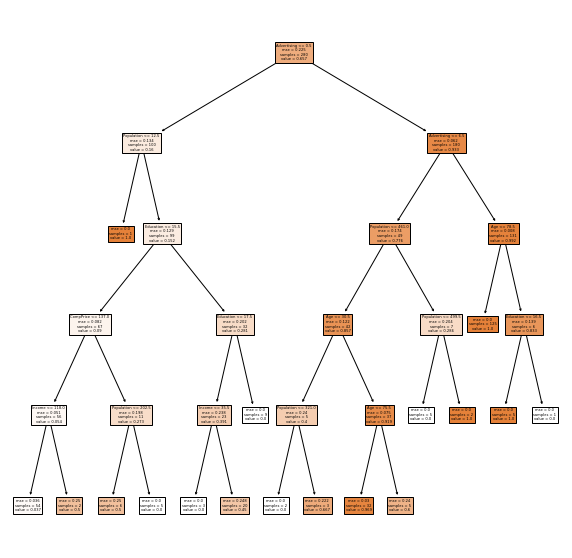

In [31]:
plt.figure(figsize=(10,10))
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
tree.plot_tree(model,feature_names=fn,filled=True)

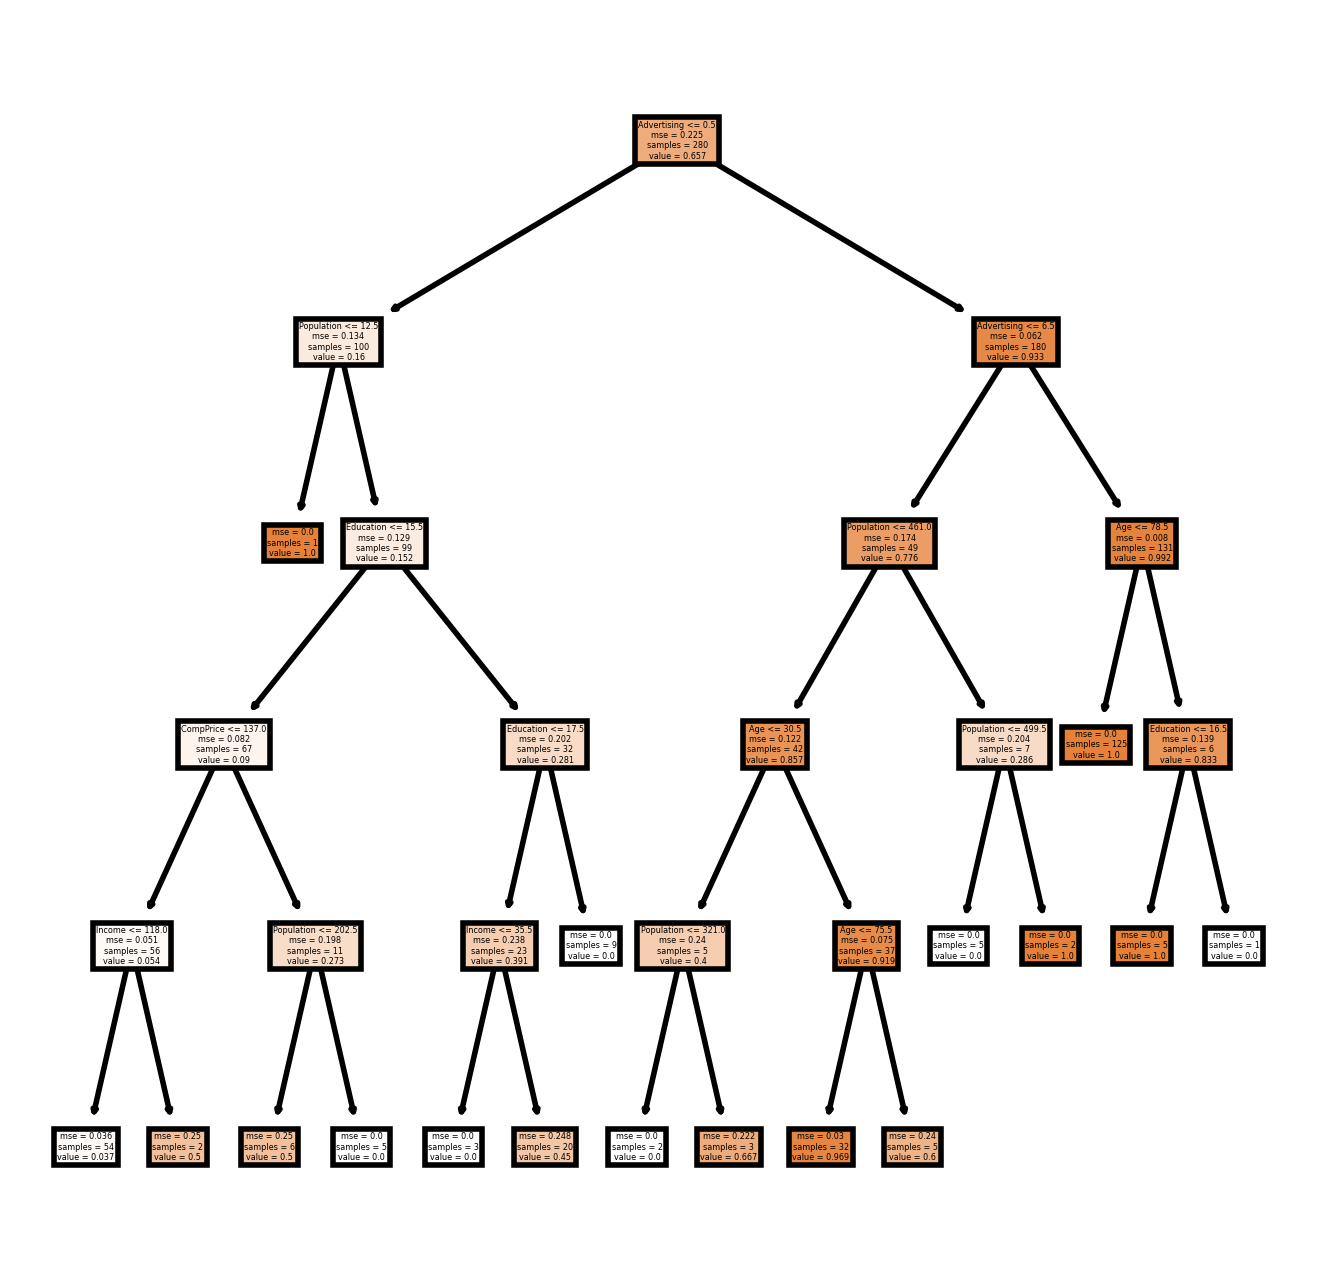

In [32]:
fn=['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education','Urban', 'US']
cn=['high','low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [33]:
#Predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts() 

1.000000    57
0.968750    17
0.037037    16
0.000000    14
0.450000    13
0.500000     2
0.600000     1
dtype: int64

In [34]:
preds

array([1.        , 1.        , 0.96875   , 0.96875   , 0.96875   ,
       0.96875   , 1.        , 1.        , 1.        , 0.96875   ,
       0.96875   , 1.        , 0.03703704, 0.03703704, 0.03703704,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.03703704, 0.45      , 1.        , 0.        , 0.45      ,
       1.        , 0.        , 1.        , 0.96875   , 0.        ,
       1.        , 0.03703704, 0.96875   , 1.        , 1.        ,
       1.        , 0.96875   , 0.        , 0.96875   , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.45      , 0.03703704, 1.        , 0.45      , 0.        ,
       0.45      , 1.        , 0.        , 1.        , 1.        ,
       0.03703704, 0.45      , 0.03703704, 0.        , 1.        ,
       1.        , 0.03703704, 0.96875   , 1.        , 1.        ,
       1.        , 0.45      , 0.96875   , 1.        , 0.        ,
       0.        , 0.        , 0.45      , 0.45      , 0.96875

In [35]:
pd.crosstab(y_test,preds)

col_0,0.000000,0.037037,0.450000,0.500000,0.600000,0.968750,1.000000
US,,,,,,,
0,13,14,12,2,1,2,2
1,1,2,1,0,0,15,55


In [36]:
#Accuracy
np.mean(preds==y_test)

0.5666666666666667